In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

**here we download the flower data from keras database** 

In [ ]:
(x_train,y_train),(x_test,y_test)=keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 13s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
y_train=y_train.reshape(-1)

In [ ]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

**this is the name of flower in array sequence**

In [ ]:
images=['airplane','automobile','bird' ,'cat','deer','dog','frog','horse','ship','truck' ]

In [ ]:
images[y_train[0]]

'frog'

In [ ]:
def show_img(index):
  plt.figure(figsize=(1,2))
  plt.imshow(x_train[index])
  plt.xlabel(images[y_train[index]])
  plt.show()

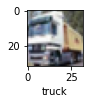

In [ ]:
show_img(1)

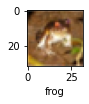

In [ ]:
show_img(0)

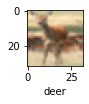

In [ ]:
show_img(780)

**here we scale the data for better score**

In [ ]:
#scalling
x_train_scale=x_train/255
x_test_scale=x_test/255

In [ ]:
x_train_scale[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
x_train_scale.shape

(50000, 32, 32, 3)

In [ ]:
len(x_train_scale)

50000

**:::here we use artificial nural network (ANN)for image classification :::**

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10,activation='sigmoid')
])

In [ ]:
model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_scale,y_train,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 9s 4ms/step - loss: 1.9115 - accuracy: 0.3129
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7421 - accuracy: 0.3790
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6701 - accuracy: 0.4062
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6219 - accuracy: 0.4266
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5858 - accuracy: 0.4375
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5542 - accuracy: 0.4493
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5241 - accuracy: 0.4609
Epoch 8/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5009 - accuracy: 0.4700
Epoch 9/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4778 - accuracy: 0.4780
Epoch 10/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.456

In [ ]:
model.evaluate(x_test_scale,y_test)
##the accuracy is low in ANN only 56 percent

313/313 [==============================] - 1s 3ms/step - loss: 1.2560 - accuracy: 0.5603


[1.2560334205627441, 0.5602999925613403]

here we use convutional network for image prediction

In [ ]:
model_cnn=keras.Sequential([
    #cnn layer
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    #dense layers
    keras.layers.Flatten(),
    keras.layers.Dense(1500,activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(800,activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(800,activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10,activation='softmax')

])


In [ ]:
model_cnn.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model_cnn.fit(x_train_scale,y_train,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 7s 4ms/step - loss: 2.1475 - accuracy: 0.1932
Epoch 2/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8052 - accuracy: 0.3354
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5832 - accuracy: 0.4201
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4502 - accuracy: 0.4713
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3500 - accuracy: 0.5093
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2662 - accuracy: 0.5422
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1936 - accuracy: 0.5705
Epoch 8/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1218 - accuracy: 0.5955
Epoch 9/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0608 - accuracy: 0.6209
Epoch 10/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.003

**this is score of model**

In [ ]:
model_cnn.evaluate(x_test_scale,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8934 - accuracy: 0.7029


[0.8933613300323486, 0.7028999924659729]

In [ ]:
prediction=model_cnn.predict(x_test_scale)

**here we test the model**

In [ ]:
prediction[0]

array([0.01155814, 0.00095525, 0.03596475, 0.68532705, 0.00915233,
       0.19484146, 0.02039956, 0.00207926, 0.03893581, 0.00078636],
      dtype=float32)

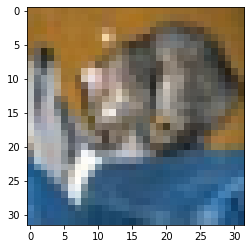

In [ ]:
plt.imshow(x_test[0])

In [ ]:
y_test[0]

array([3], dtype=uint8)

In [ ]:
np.argmax(prediction[0])

3

In [ ]:
def img_show2(index):
  plt.figure(figsize=(1,2))
  plt.imshow(x_test[index])
  plt.xlabel(images[np.argmax(prediction[index])])
  plt.show()

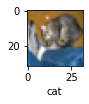

In [ ]:
img_show2(0)

                                                            **thankyou**